<a href="https://colab.research.google.com/github/gulsumaltintas/MachineLearning/blob/main/Senaryo_3_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/gdrive/My Drive/diabetes_prediction_dataset.csv')

In [ ]:
random_state = 1000

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isna().sum() #boş değer olmadığı için doldurma yapmaya gerek yok.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
heart_disease = np.where(df['blood_glucose_level']>100, 1, 0)

In [ ]:
pd.crosstab(heart_disease, heart_disease, normalize='all')*100

col_0,0,1
row_0,,
0,28.144,0.000
1,0.000,71.856


In [ ]:
df['heart_disease'] = heart_disease

df.drop('blood_glucose_level', axis=1, inplace=True)

df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'diabetes'],
      dtype='object')

In [ ]:
categorical = ['gender','smoking_history']
#object olan kısımları category olarak değiştirecek
for col in categorical:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   gender           100000 non-null  category
 1   age              100000 non-null  float64 
 2   hypertension     100000 non-null  int64   
 3   heart_disease    100000 non-null  int64   
 4   smoking_history  100000 non-null  category
 5   bmi              100000 non-null  float64 
 6   HbA1c_level      100000 non-null  float64 
 7   diabetes         100000 non-null  int64   
dtypes: category(2), float64(3), int64(3)
memory usage: 4.8 MB


In [ ]:
target_drop_columns_gender = {k:v for k, v in zip(df['gender'].unique(), list(range(len(df['gender'].unique()))))}

In [ ]:
target_drop_columns_gender

{'Female': 0, 'Male': 1, 'Other': 2}

In [ ]:
df['gender'] = df['gender'].map(target_drop_columns_gender)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,0
1,0,54.0,0,0,No Info,27.32,6.6,0
2,1,28.0,0,1,never,27.32,5.7,0
3,0,36.0,0,1,current,23.45,5.0,0
4,1,76.0,1,1,current,20.14,4.8,0


In [ ]:
target_drop_columns_summary = {k:v for k, v in zip(df['smoking_history'].unique(), list(range(len(df['smoking_history'].unique()))))}
target_drop_columns_summary

{'never': 0,
 'No Info': 1,
 'current': 2,
 'former': 3,
 'ever': 4,
 'not current': 5}

In [ ]:
df['smoking_history'] = df['smoking_history'].map(target_drop_columns_summary)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,0
1,0,54.0,0,0,1,27.32,6.6,0
2,1,28.0,0,1,0,27.32,5.7,0
3,0,36.0,0,1,2,23.45,5.0,0
4,1,76.0,1,1,2,20.14,4.8,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,1,27.32,6.2,0
99996,0,2.0,0,0,1,17.37,6.5,0
99997,1,66.0,0,1,3,27.83,5.7,0
99998,0,24.0,0,0,0,35.42,4.0,0


In [ ]:
df = pd.get_dummies(df, drop_first=True) #sütunlarda kaç özellik olduğunu görmek için.
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'diabetes', 'gender_1', 'gender_2', 'smoking_history_2',
       'smoking_history_4', 'smoking_history_3', 'smoking_history_0',
       'smoking_history_5'],
      dtype='object')

In [ ]:
df.shape #ilk duruma göre daha fazla özniteliğimiz oldu

(100000, 13)

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,diabetes,gender_1,gender_2,smoking_history_2,smoking_history_4,smoking_history_3,smoking_history_0,smoking_history_5
0,80.0,0,1,25.19,6.6,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,0,0,0,0,0,0,0,0
2,28.0,0,1,27.32,5.7,0,1,0,0,0,0,1,0
3,36.0,0,1,23.45,5.0,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,0,1,0,1,0,0,0,0


## **%80 - %20 şeklinde ayrılan veri seti tipi için sonuçları**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

df_sc['heart_disease'] = df['heart_disease']

In [ ]:
df_sc.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,diabetes,gender_1,gender_2,smoking_history_2,smoking_history_4,smoking_history_3,smoking_history_0,smoking_history_5
0,1.692704,-0.284439,1,-0.321056,1.001706,-0.304789,-0.841046,-0.013418,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
1,0.538006,-0.284439,0,-0.000116,1.001706,-0.304789,-0.841046,-0.013418,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
2,-0.616691,-0.284439,1,-0.000116,0.161108,-0.304789,1.188995,-0.013418,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
3,-0.261399,-0.284439,1,-0.583232,-0.492690,-0.304789,-0.841046,-0.013418,3.125524,-0.20423,-0.321198,-0.735332,-0.262512
4,1.515058,3.515687,1,-1.081970,-0.679490,-0.304789,1.188995,-0.013418,3.125524,-0.20423,-0.321198,-0.735332,-0.262512


In [ ]:
y = df_sc['heart_disease'] #tahmin edeceğim sütun

X = df_sc.drop('heart_disease', axis=1) #precip_type dışındaki sütunlar burada olacak

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

**SVM**

In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [ ]:
y_head = SVM_classification.predict(X_Test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

In [ ]:
predictions

,y_test,y_head
81768,1,1
72785,1,1
16208,0,1
39960,1,1
61947,1,1
...,...,...
65693,0,1
51699,1,1
28068,1,1
74992,0,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_accuracy = accuracy_score(y_test, y_head)
svm_precision = precision_score(y_test, y_head)
svm_recall= recall_score(y_test, y_head)
svm_f1_score= f1_score(y_test, y_head)

**SVM Confusion Matrix**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,y_head)
svm_cm

array([[    0,  5660],
       [    0, 14340]])

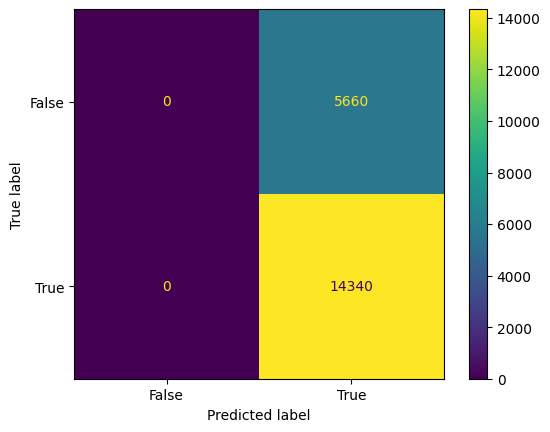

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
svm_confusion_matrix = metrics.confusion_matrix(y_test,y_head)


svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

svm_cm_display.plot()
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = random_forest.predict(X_Test)

In [ ]:
rf_accuracy= accuracy_score(y_test, rf_prediction)
rf_precision= precision_score(y_test, rf_prediction)
rf_recall= recall_score(y_test, rf_prediction)
rf_f1_score= f1_score(y_test, rf_prediction)

**Random Forest Confusion Matrix**

In [ ]:
rf_cm = confusion_matrix(y_test,rf_prediction)
rf_cm

array([[ 1031,  4629],
       [ 2364, 11976]])

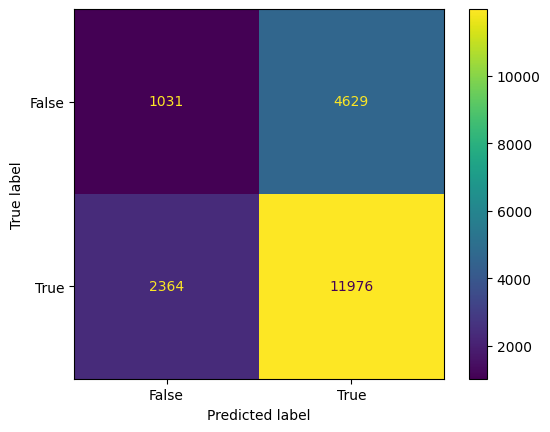

In [ ]:
rf_confusion_matrix = metrics.confusion_matrix(y_test,rf_prediction)


rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

rf_cm_display.plot()
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
dt_predict = decision_tree.predict(X_Test)

dtree_accuracy= accuracy_score(y_test, dt_predict)
dtree_precision= precision_score(y_test, dt_predict)
dtree_recall= recall_score(y_test, dt_predict)
dtree_f1_score= f1_score(y_test, dt_predict)


**Decision Tree Confusion Matrix**

In [ ]:
dt_cm = confusion_matrix(y_test,dt_predict)
dt_cm

array([[ 1784,  3876],
       [ 4101, 10239]])

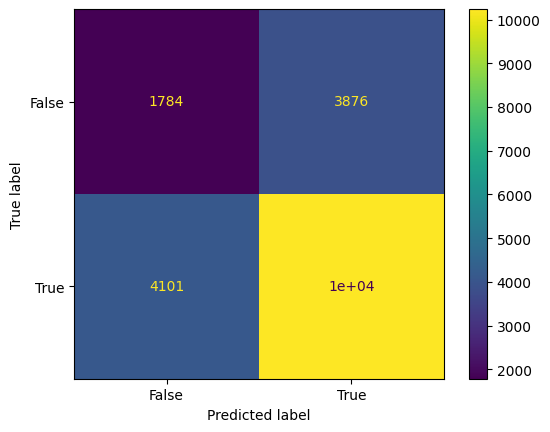

In [ ]:
dt_confusion_matrix = metrics.confusion_matrix(y_test,dt_predict)


dt_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

dt_cm_display.plot()
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
nb_predict = nb.predict(X_Test)


nb_accuracy= accuracy_score(y_test, nb_predict)
nb_precision= precision_score(y_test, nb_predict)
nb_recall= recall_score(y_test, nb_predict)
nb_f1_score= f1_score(y_test, nb_predict)

**Navive Bayes Confusion Matrix**

In [ ]:
nb_cm = confusion_matrix(y_test,nb_predict)
nb_cm

array([[ 5659,     1],
       [12653,  1687]])

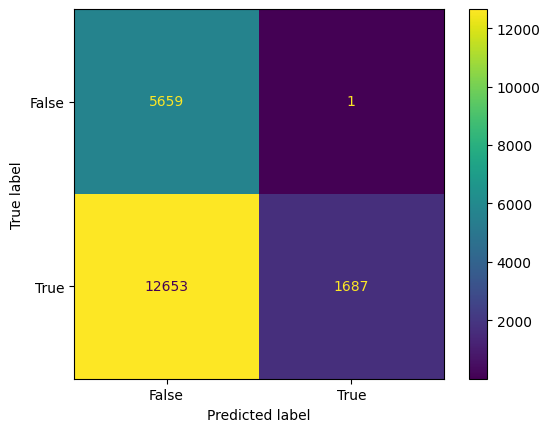

In [ ]:
nb_confusion_matrix = metrics.confusion_matrix(y_test,nb_predict)


nb_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

nb_cm_display.plot()
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)
logReg_predict = logReg.predict(X_Test)

lr_accuracy= accuracy_score(y_test, logReg_predict)
lr_precision= precision_score(y_test, logReg_predict)
lr_recall= recall_score(y_test, logReg_predict)
lr_f1_score= f1_score(y_test, logReg_predict)

**Logistic Regression Confusion Matrix**

In [ ]:
lr_cm = confusion_matrix(y_test,logReg_predict)
lr_cm

array([[    0,  5660],
       [    0, 14340]])

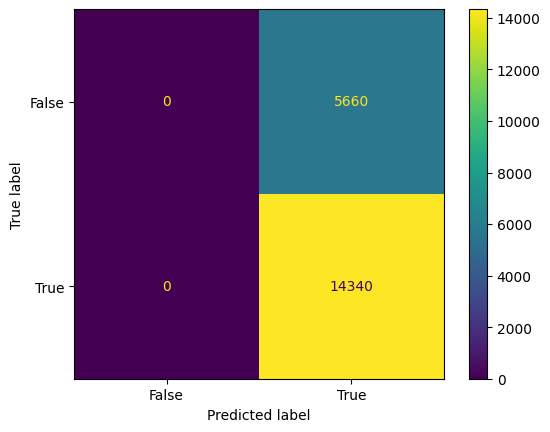

In [ ]:
lr_confusion_matrix = metrics.confusion_matrix(y_test,logReg_predict)


lr_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

lr_cm_display.plot()
plt.show()

**Multi–Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_predicted = mlp.predict(X_Test)

mlp_accuracy= accuracy_score(y_test, mlp_predicted)
mlp_precision= precision_score(y_test, mlp_predicted)
mlp_recall= recall_score(y_test, mlp_predicted)
mlp_f1_score= f1_score(y_test, mlp_predicted)

**Multi-Layer Perceptron Confusion Matrix**

In [ ]:
mlp_cm = confusion_matrix(y_test,mlp_predicted)
mlp_cm

array([[    1,  5659],
       [    3, 14337]])

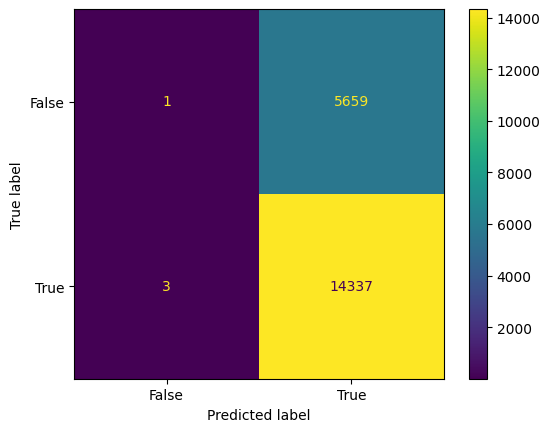

In [ ]:
mlp_confusion_matrix = metrics.confusion_matrix(y_test,mlp_predicted)


mlp_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = mlp_confusion_matrix, display_labels = [False, True])

mlp_cm_display.plot()
plt.show()

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predict = knn.predict(X_Test)

knn_accuracy= accuracy_score(y_test, knn_predict)
knn_precision= precision_score(y_test, knn_predict)
knn_recall= recall_score(y_test, knn_predict)
knn_f1_score= f1_score(y_test, knn_predict)

**K-Nearest Neighbor Confusion Matrix**

In [ ]:
knn_cm = confusion_matrix(y_test,knn_predict)
knn_cm

array([[ 1001,  4659],
       [ 2196, 12144]])

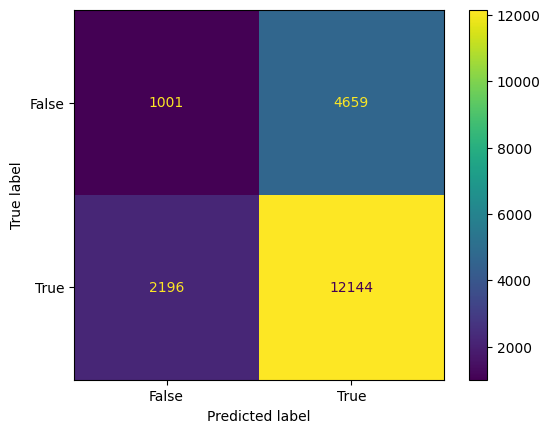

In [ ]:
knn_confusion_matrix = metrics.confusion_matrix(y_test,knn_predict)


knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

knn_cm_display.plot()
plt.show()

In [ ]:
tablo = {
    "Model": ["SVM","Random Forest","Decision Tree","Naive Bayes","Logistic Regression","Multi –Layer Perceptron","K-Nearest Neighbor"],
    "Accuracy": [svm_accuracy,rf_accuracy,dtree_accuracy,nb_accuracy,lr_accuracy,mlp_accuracy,knn_accuracy],
    "Precision": [svm_precision,rf_precision,dtree_precision,nb_precision,lr_precision,mlp_precision,knn_precision],
    "Recall": [svm_recall,rf_recall,dtree_recall,nb_recall,lr_recall,mlp_recall,knn_recall],
    "F1": [svm_f1_score,rf_f1_score,dtree_f1_score,nb_f1_score,lr_f1_score,mlp_f1_score,knn_f1_score]

    }

In [ ]:
pd.DataFrame(tablo)

,Model,Accuracy,Precision,Recall,F1
0,SVM,0.71700,0.717000,1.000000,0.835178
1,Random Forest,0.65035,0.721229,0.835146,0.774018
2,Decision Tree,0.60115,0.725399,0.714017,0.719663
3,Naive Bayes,0.36730,0.999408,0.117643,0.210507
4,Logistic Regression,0.71700,0.717000,1.000000,0.835178
5,Multi –Layer Perceptron,0.71690,0.716993,0.999791,0.835100
6,K-Nearest Neighbor,0.65725,0.722728,0.846862,0.779886


**%75 - %25 şeklinde ayrılan veri seti tipi için sonuçları**

In [ ]:
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=random_state)

**SVM**

In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [ ]:
y_head = SVM_classification.predict(X_Test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})
predictions

,y_test,y_head
81768,1,1
72785,1,1
16208,0,1
39960,1,1
61947,1,1
...,...,...
14547,1,1
24357,0,1
87579,1,1
11835,1,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_accuracy3 = accuracy_score(y_test, y_head)
svm_precision3 = precision_score(y_test, y_head)
svm_recall3= recall_score(y_test, y_head)
svm_f1_score3= f1_score(y_test, y_head)

**SVM Confusion Matrix**

In [ ]:
svm25_cm = confusion_matrix(y_test,y_head)
svm25_cm

array([[    0,  7074],
       [    0, 17926]])

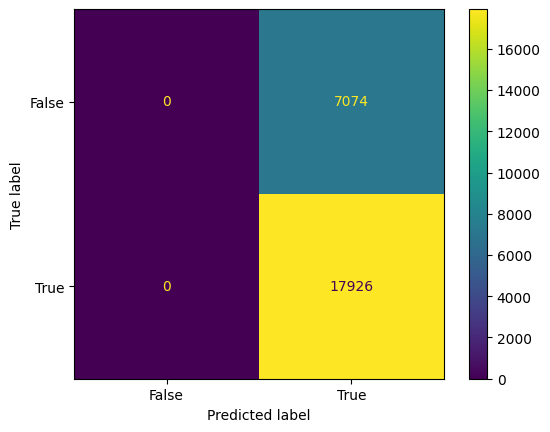

In [ ]:
svm25_confusion_matrix = metrics.confusion_matrix(y_test,y_head)


svm25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm25_confusion_matrix, display_labels = [False, True])

svm25_cm_display.plot()
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
rf_prediction = random_forest.predict(X_Test)

rf_accuracy3= accuracy_score(y_test, rf_prediction)
rf_precision3= precision_score(y_test, rf_prediction)
rf_recall3= recall_score(y_test, rf_prediction)
rf_f1_score3= f1_score(y_test, rf_prediction)


**Random Forest Confusion Matrix**

In [ ]:
rf25_cm = confusion_matrix(y_test,rf_prediction)
rf25_cm

array([[ 1307,  5767],
       [ 2981, 14945]])

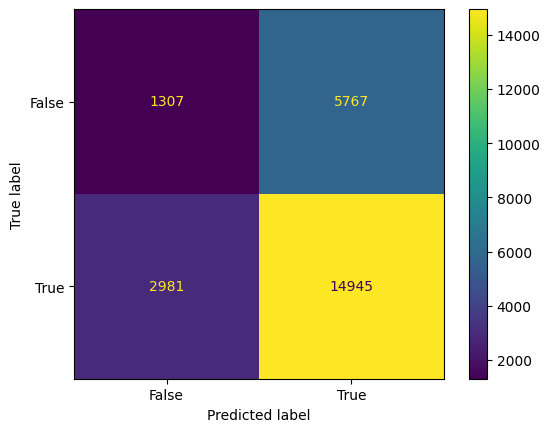

In [ ]:
rf25_confusion_matrix = metrics.confusion_matrix(y_test,rf_prediction)


rf25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf25_confusion_matrix, display_labels = [False, True])

rf25_cm_display.plot()
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
dt_predict = decision_tree.predict(X_Test)

dtree_accuracy3= accuracy_score(y_test, dt_predict)
dtree_precision3= precision_score(y_test, dt_predict)
dtree_recall3= recall_score(y_test, dt_predict)
dtree_f1_score3= f1_score(y_test, dt_predict)

**Decion Tree Confusion Matrix**

In [ ]:
dt25_cm = confusion_matrix(y_test,dt_predict)
dt25_cm

array([[ 2250,  4824],
       [ 5094, 12832]])

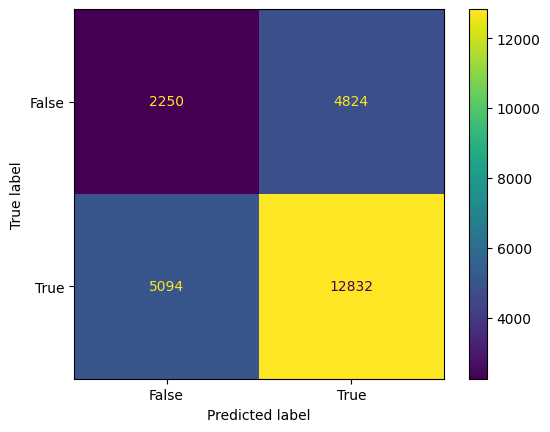

In [ ]:
dt25_confusion_matrix = metrics.confusion_matrix(y_test,dt_predict)


dt25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dt25_confusion_matrix, display_labels = [False, True])

dt25_cm_display.plot()
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
nb_predict = nb.predict(X_Test)


nb_accuracy3= accuracy_score(y_test, nb_predict)
nb_precision3= precision_score(y_test, nb_predict)
nb_recall3= recall_score(y_test, nb_predict)
nb_f1_score3= f1_score(y_test, nb_predict)

**Naive Bayes Confusion Matrix**

In [ ]:
nb25_cm = confusion_matrix(y_test,nb_predict)
nb25_cm

array([[ 7072,     2],
       [15768,  2158]])

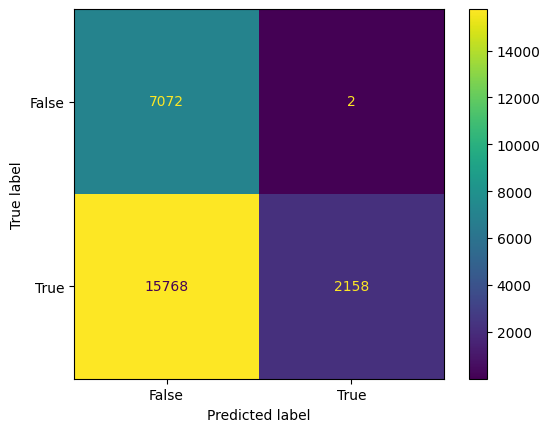

In [ ]:
nb25_confusion_matrix = metrics.confusion_matrix(y_test,nb_predict)


nb25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb25_confusion_matrix, display_labels = [False, True])

nb25_cm_display.plot()
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)
logReg_predict = logReg.predict(X_Test)

lr_accuracy3= accuracy_score(y_test, logReg_predict)
lr_precision3= precision_score(y_test, logReg_predict)
lr_recall3= recall_score(y_test, logReg_predict)
lr_f1_score3= f1_score(y_test, logReg_predict)

**Logistic Regression Confusion Matrix**

In [ ]:
lr25_cm = confusion_matrix(y_test,logReg_predict)
lr25_cm

array([[    0,  7074],
       [    0, 17926]])

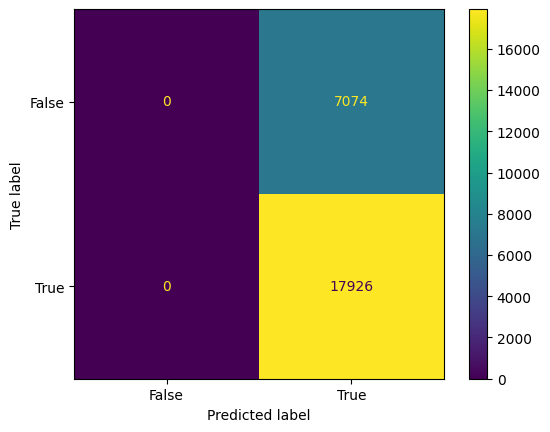

In [ ]:
lr25_confusion_matrix = metrics.confusion_matrix(y_test,logReg_predict)


lr25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr25_confusion_matrix, display_labels = [False, True])

lr25_cm_display.plot()
plt.show()

**Multi-Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_predicted = mlp.predict(X_Test)

mlp_accuracy3= accuracy_score(y_test, mlp_predicted)
mlp_precision3= precision_score(y_test, mlp_predicted)
mlp_recall3= recall_score(y_test, mlp_predicted)
mlp_f1_score3= f1_score(y_test, mlp_predicted)

**Multi-Layer Perceptron Confusion Matrix**

In [ ]:
mlp25_cm = confusion_matrix(y_test,mlp_predicted)
mlp25_cm

array([[    0,  7074],
       [    0, 17926]])

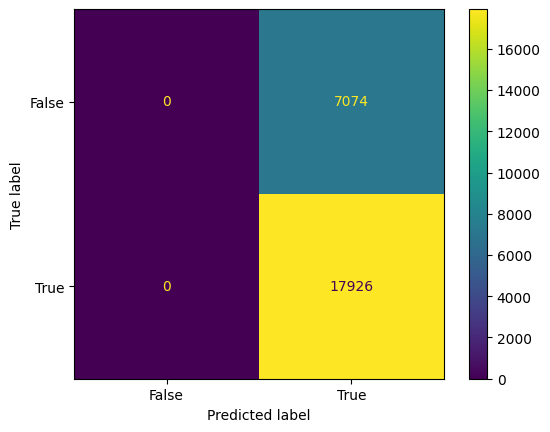

In [ ]:
mlp25_confusion_matrix = metrics.confusion_matrix(y_test,mlp_predicted)


mlp25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = mlp25_confusion_matrix, display_labels = [False, True])

mlp25_cm_display.plot()
plt.show()

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predict = knn.predict(X_Test)

knn_accuracy3= accuracy_score(y_test, knn_predict)
knn_precision3= precision_score(y_test, knn_predict)
knn_recall3= recall_score(y_test, knn_predict)
knn_f1_score3= f1_score(y_test, knn_predict)

**K-Nearest Neigbor Confusion Matrix**

In [ ]:
knn25_cm = confusion_matrix(y_test,knn_predict)
knn25_cm

array([[ 1251,  5823],
       [ 2805, 15121]])

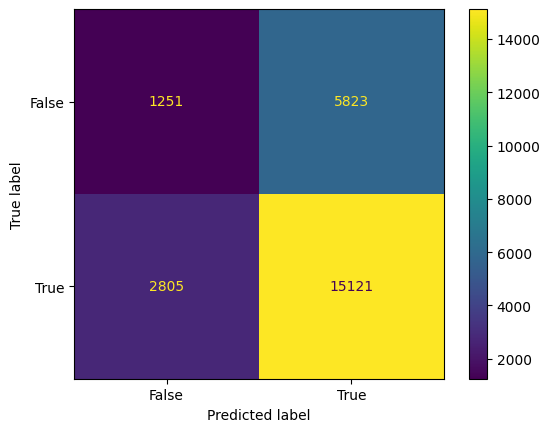

In [ ]:
knn25_confusion_matrix = metrics.confusion_matrix(y_test,knn_predict)


knn25_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn25_confusion_matrix, display_labels = [False, True])

knn25_cm_display.plot()
plt.show()

In [ ]:
tablo3 = {
    "Model": ["SVM","Random Forest","Decision Tree","Naive Bayes","Logistic Regression","Multi –Layer Perceptron","K-Nearest Neighbor"],
    "Accuracy": [svm_accuracy3,rf_accuracy3,dtree_accuracy3,nb_accuracy3,lr_accuracy3,mlp_accuracy3,knn_accuracy3],
    "Precision": [svm_precision3,rf_precision3,dtree_precision3,nb_precision3,lr_precision3,mlp_precision3,knn_precision3],
    "Recall": [svm_recall3,rf_recall3,dtree_recall3,nb_recall3,lr_recall3,mlp_recall3,knn_recall3],
    "F1": [svm_f1_score3,rf_f1_score3,dtree_f1_score3,nb_f1_score3,lr_f1_score3,mlp_f1_score3,knn_f1_score3]

    }

In [ ]:
pd.DataFrame(tablo3)

,Model,Accuracy,Precision,Recall,F1
0,SVM,0.71704,0.717040,1.000000,0.835205
1,Random Forest,0.65008,0.721562,0.833705,0.773591
2,Decision Tree,0.60328,0.726778,0.715832,0.721264
3,Naive Bayes,0.36920,0.999074,0.120384,0.214876
4,Logistic Regression,0.71704,0.717040,1.000000,0.835205
5,Multi –Layer Perceptron,0.71704,0.717040,1.000000,0.835205
6,K-Nearest Neighbor,0.65488,0.721973,0.843523,0.778029


**%70 - %30 şeklinde ayrılan veri seti tipi için sonuçları**

In [ ]:
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=random_state)

**SVM**

In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

y_head = SVM_classification.predict(X_Test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

predictions

,y_test,y_head
81768,1,1
72785,1,1
16208,0,1
39960,1,1
61947,1,1
...,...,...
88775,1,1
56647,1,1
15635,1,1
8818,1,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_accuracy2 = accuracy_score(y_test, y_head)
svm_precision2 = precision_score(y_test, y_head)
svm_recall2= recall_score(y_test, y_head)
svm_f1_score2= f1_score(y_test, y_head)

**SVM Confusion Matrix**



In [ ]:
svm30_cm = confusion_matrix(y_test,y_head)
svm30_cm

array([[    0,  8435],
       [    0, 21565]])

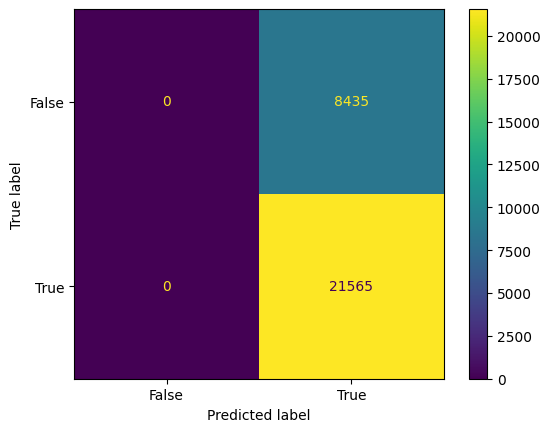

In [ ]:
svm30_confusion_matrix = metrics.confusion_matrix(y_test,y_head)


svm30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm30_confusion_matrix, display_labels = [False, True])

svm30_cm_display.plot()
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
rf_prediction = random_forest.predict(X_Test)

rf_accuracy2= accuracy_score(y_test, rf_prediction)
rf_precision2= precision_score(y_test, rf_prediction)
rf_recall2= recall_score(y_test, rf_prediction)
rf_f1_score2= f1_score(y_test, rf_prediction)


**Random Forest Confusion Matrix**

In [ ]:
rf30_cm = confusion_matrix(y_test,rf_prediction)
rf30_cm

array([[ 1602,  6833],
       [ 3602, 17963]])

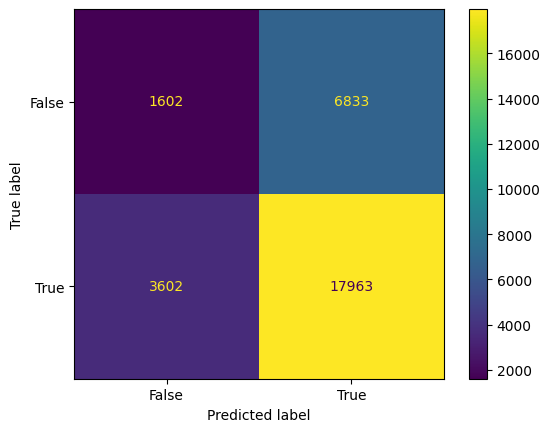

In [ ]:
rf30_confusion_matrix = metrics.confusion_matrix(y_test,rf_prediction)


rf30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf30_confusion_matrix, display_labels = [False, True])

rf30_cm_display.plot()
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
dt_predict = decision_tree.predict(X_Test)

dtree_accuracy2= accuracy_score(y_test, dt_predict)
dtree_precision2= precision_score(y_test, dt_predict)
dtree_recall2= recall_score(y_test, dt_predict)
dtree_f1_score2= f1_score(y_test, dt_predict)

**Decision Tree Confusion Matrix**

In [ ]:
dt30_cm = confusion_matrix(y_test,dt_predict)
dt30_cm

array([[ 2718,  5717],
       [ 6078, 15487]])

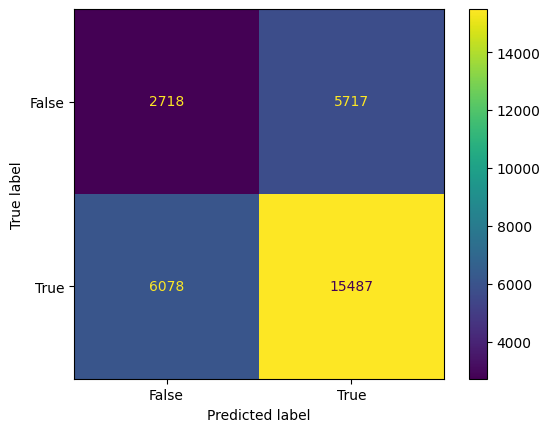

In [ ]:
dt30_confusion_matrix = metrics.confusion_matrix(y_test,dt_predict)


dt30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dt30_confusion_matrix, display_labels = [False, True])

dt30_cm_display.plot()
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
nb_predict = nb.predict(X_Test)


nb_accuracy2= accuracy_score(y_test, nb_predict)
nb_precision2= precision_score(y_test, nb_predict)
nb_recall2= recall_score(y_test, nb_predict)
nb_f1_score2= f1_score(y_test, nb_predict)

**Naive Bayes Confusion Matrix**

In [ ]:
nb30_cm = confusion_matrix(y_test,nb_predict)
nb30_cm

array([[ 8433,     2],
       [18966,  2599]])

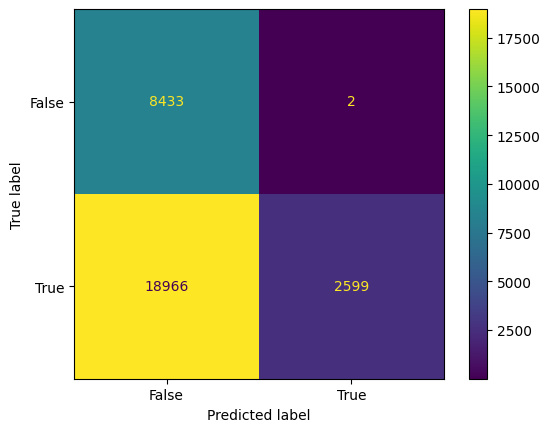

In [ ]:
nb30_confusion_matrix = metrics.confusion_matrix(y_test,nb_predict)


nb30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb30_confusion_matrix, display_labels = [False, True])

nb30_cm_display.plot()
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)
logReg_predict = logReg.predict(X_Test)

lr_accuracy2= accuracy_score(y_test, logReg_predict)
lr_precision2= precision_score(y_test, logReg_predict)
lr_recall2= recall_score(y_test, logReg_predict)
lr_f1_score2= f1_score(y_test, logReg_predict)

**Logistic Regression Confusion Matrix**

In [ ]:
lr30_cm = confusion_matrix(y_test,logReg_predict)
lr30_cm

array([[    0,  8435],
       [    0, 21565]])

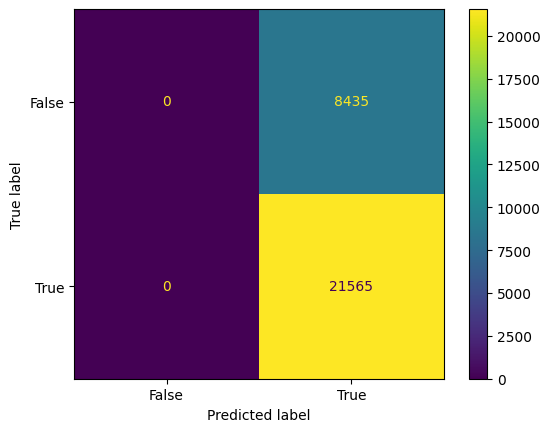

In [ ]:
lr30_confusion_matrix = metrics.confusion_matrix(y_test,logReg_predict)


lr30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr30_confusion_matrix, display_labels = [False, True])

lr30_cm_display.plot()
plt.show()

**Multi–Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_predicted = mlp.predict(X_Test)

mlp_accuracy2= accuracy_score(y_test, mlp_predicted)
mlp_precision2= precision_score(y_test, mlp_predicted)
mlp_recall2= recall_score(y_test, mlp_predicted)
mlp_f1_score2= f1_score(y_test, mlp_predicted)

**Multi-Layer Perceptron Confusion Matrix**

In [ ]:
mlp30_cm = confusion_matrix(y_test,mlp_predicted)
mlp30_cm

array([[    0,  8435],
       [    0, 21565]])

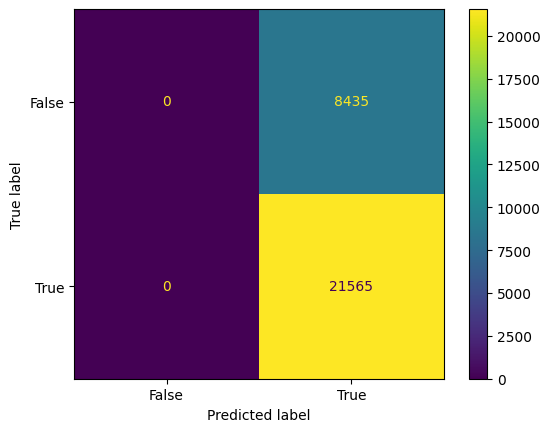

In [ ]:
mlp30_confusion_matrix = metrics.confusion_matrix(y_test,mlp_predicted)


mlp30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = mlp30_confusion_matrix, display_labels = [False, True])

mlp30_cm_display.plot()
plt.show()

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predict = knn.predict(X_Test)

knn_accuracy2= accuracy_score(y_test, knn_predict)
knn_precision2= precision_score(y_test, knn_predict)
knn_recall2= recall_score(y_test, knn_predict)
knn_f1_score2= f1_score(y_test, knn_predict)

**K-Nearest Neighbor Confusion Matrix**

In [ ]:
knn30_cm = confusion_matrix(y_test,knn_predict)
knn30_cm

array([[ 1484,  6951],
       [ 3404, 18161]])

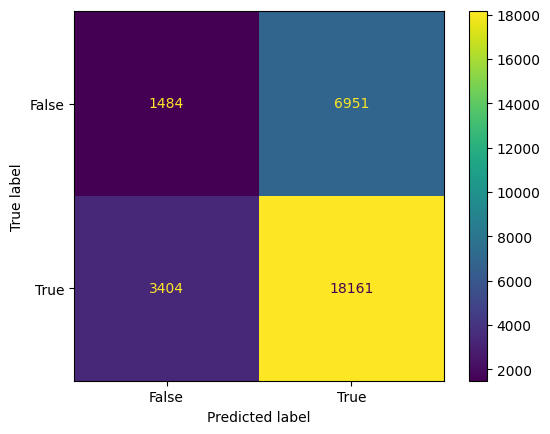

In [ ]:
knn30_confusion_matrix = metrics.confusion_matrix(y_test,knn_predict)


knn30_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn30_confusion_matrix, display_labels = [False, True])

knn30_cm_display.plot()
plt.show()

In [ ]:
tablo2 = {
    "Model": ["SVM","Random Forest","Decision Tree","Naive Bayes","Logistic Regression","Multi –Layer Perceptron","K-Nearest Neighbor"],
    "Accuracy": [svm_accuracy2,rf_accuracy2,dtree_accuracy2,nb_accuracy2,lr_accuracy2,mlp_accuracy2,knn_accuracy2],
    "Precision": [svm_precision2,rf_precision2,dtree_precision2,nb_precision2,lr_precision2,mlp_precision2,knn_precision2],
    "Recall": [svm_recall2,rf_recall2,dtree_recall2,nb_recall2,lr_recall2,mlp_recall2,knn_recall2],
    "F1": [svm_f1_score2,rf_f1_score2,dtree_f1_score2,nb_f1_score2,lr_f1_score2,mlp_f1_score2,knn_f1_score2]

    }

In [ ]:
pd.DataFrame(tablo2)

,Model,Accuracy,Precision,Recall,F1
0,SVM,0.718833,0.718833,1.000000,0.836420
1,Random Forest,0.652167,0.724431,0.832970,0.774919
2,Decision Tree,0.606833,0.730381,0.718154,0.724216
3,Naive Bayes,0.367733,0.999231,0.120519,0.215096
4,Logistic Regression,0.718833,0.718833,1.000000,0.836420
5,Multi –Layer Perceptron,0.718833,0.718833,1.000000,0.836420
6,K-Nearest Neighbor,0.654833,0.723200,0.842152,0.778156


## **OPTİMİZASYON ALGORİTMALARI**

**%70-%30 olarak ayrılan veri setinin hiperparametre optimizasyonu**

**SVM Optimizasyonu**

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid_SVM = SVC().get_params()

grid_SVM = GridSearchCV(SVC(), param_grid_SVM, refit=True, verbose = 3, cv=5)

grid_SVM.fit(X_train, y_train)